In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Text(0, 0.5, 'V')

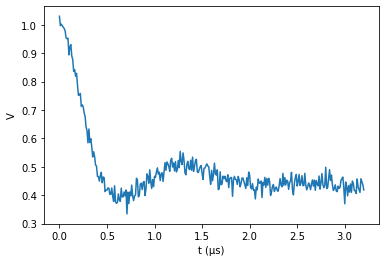

In [2]:
loaded_data = np.genfromtxt("../../data/3992_good.dat", skip_header = 1, delimiter = ',')
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

plt.plot(t, Vexp)
plt.xlabel('t (µs)')
plt.ylabel('V')

# NUTS: k, V0, lambda, sigma; Gibbs: P, delta

In [3]:
pars = {"method": 'regularization', "r": np.linspace(2,6,200)}
model = dive.model(t, Vexp, pars)

In [4]:
MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 1433 seconds.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.046,0.003,0.039,0.052,0.000,0.000,6142.0,7946.0,1.00
λ,0.512,0.005,0.502,0.521,0.000,0.000,4072.0,7196.0,1.00
V₀,0.987,0.008,0.973,1.004,0.000,0.000,4375.0,7157.0,1.00
σ,0.020,0.001,0.019,0.022,0.000,0.000,8172.0,7999.0,1.00
δ,7991.494,3572.870,2032.926,14391.776,143.518,101.530,575.0,990.0,1.01
lg(α),0.236,0.100,0.042,0.415,0.004,0.003,594.0,1030.0,1.01


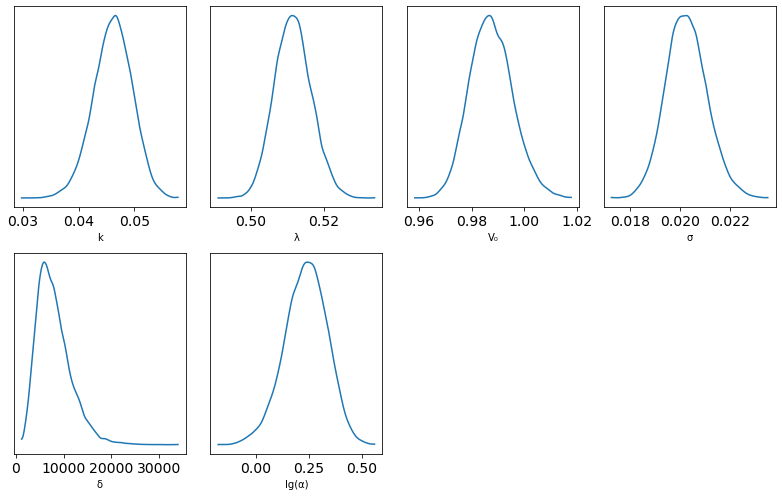

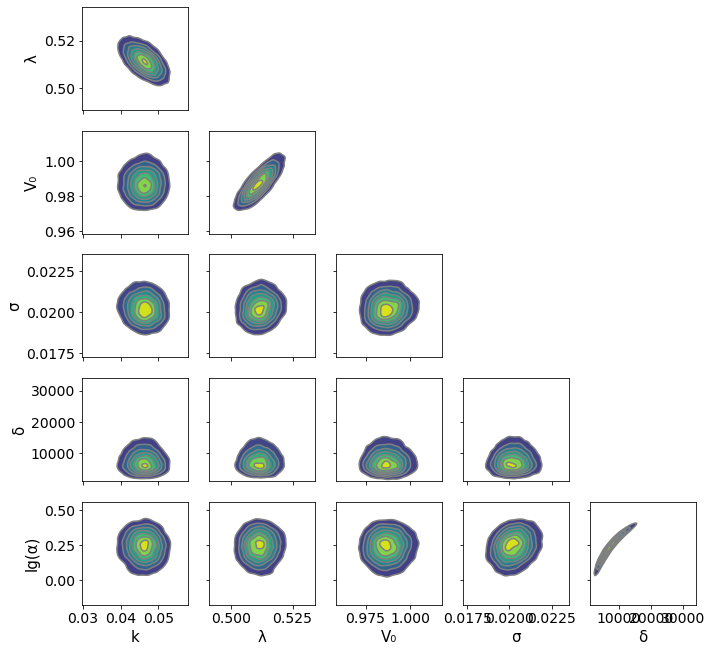

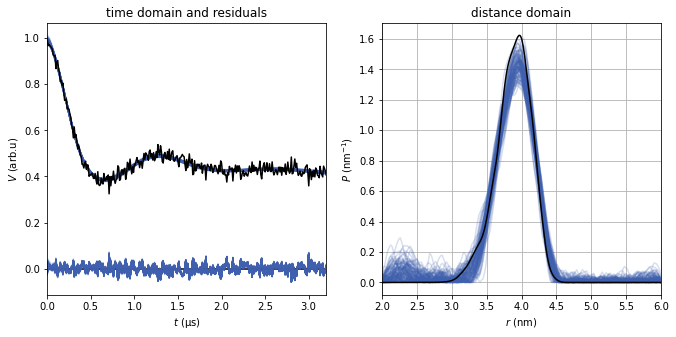

In [5]:
dive.summary(trace, model, Pid = 3992)  

# NUTS: k, V0, lambda; Gibbs: P, tau, delta

In [6]:
pars = {"method": 'regularization_taubased', "r": np.linspace(2,6,200)}
model = dive.model(t, Vexp, pars)

In [7]:
MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace_tau = dive.sample(model,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randTau: [tau]
>randDelta: [delta]
>NUTS: [k, V0, lamb]
Could not pickle model, sampling singlethreaded.
Sequential sampling (4 chains in 1 job)
CompoundStep
>SamplePfromV: [P]
>randTau: [tau]
>randDelta: [delta]
>NUTS: [k, V0, lamb]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 3735 seconds.
There were 148 divergences after tuning. Increase `target_accept` or reparameterize.
There were 379 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1630 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4112126082350208, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1718 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7037230860854429, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [9]:
dive.summary(trace_tau, model, Pid = 3992)  